In [31]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
traffic_accidents_data = pd.read_csv('/Users/admin/Desktop/Dev/DevProject/Python projects/myenv/Dataset/traffic_accidents_dict new.csv')

# check information us dataset
print("traffic_accidents Info:")
traffic_accidents_data.info()
print(f"Rows: {traffic_accidents_data.shape[0]}, Columns: {traffic_accidents_data.shape[1]}")
print("Columns:", traffic_accidents_data.columns)


traffic_accidents Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8756 entries, 0 to 8755
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   accidents            8756 non-null   int64  
 1   traffic_fine_amount  8756 non-null   float64
 2   traffic_density      8756 non-null   float64
 3   traffic_lights       8756 non-null   float64
 4   pavement_quality     8756 non-null   float64
 5   urban_area           8756 non-null   int64  
 6   average_speed        8756 non-null   float64
 7   rain_intensity       8756 non-null   float64
 8   vehicle_count        8756 non-null   float64
 9   time_of_day          8756 non-null   float64
 10  Variable             8756 non-null   object 
 11  Description          8756 non-null   object 
dtypes: float64(8), int64(2), object(2)
memory usage: 821.0+ KB
Rows: 8756, Columns: 12
Columns: Index(['accidents', 'traffic_fine_amount', 'traffic_density', 'traffic_l

In [21]:
# check Traffic accidents dataset
print("Traffic Accidents Dataset Info:")
traffic_accidents_data.info()
print(traffic_accidents_data.head(4))


Traffic Accidents Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8756 entries, 0 to 8755
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   accidents            8756 non-null   int64  
 1   traffic_fine_amount  8756 non-null   float64
 2   traffic_density      8756 non-null   float64
 3   traffic_lights       8756 non-null   float64
 4   pavement_quality     8756 non-null   float64
 5   urban_area           8756 non-null   int64  
 6   average_speed        8756 non-null   float64
 7   rain_intensity       8756 non-null   float64
 8   vehicle_count        8756 non-null   float64
 9   time_of_day          8756 non-null   float64
 10  Variable             8756 non-null   object 
 11  Description          8756 non-null   object 
dtypes: float64(8), int64(2), object(2)
memory usage: 821.0+ KB
   accidents  traffic_fine_amount  traffic_density  traffic_lights  \
0         20               

In [22]:
# Checking irrelevant data in traffic dataset
for i in traffic_accidents_data.select_dtypes(include='object').columns:
    print(traffic_accidents_data[i].value_counts())
    print("===================")


Variable
0                      8745
accidents                 2
traffic_fine_amount       1
traffic_density           1
traffic_lights            1
pavement_quality          1
urban_area                1
average_speed             1
rain_intensity            1
vehicle_count             1
time_of_day               1
Name: count, dtype: int64
Description
0                                                               8745
Number of recorded accidents, as a positive integer.               1
Traffic fine amount, expressed in thousands of USD.                1
Traffic density index, scale from 0 (low) to 10 (high).            1
Proportion of traffic lights in the area (0 to 1).                 1
Pavement quality, scale from 0 (very poor) to 5 (excellent).       1
Urban area (1) or rural area (0), as an integer.                   1
Average speed of vehicles in km/h.                                 1
Rain intensity, scale from 0 (no rain) to 3 (heavy rain).          1
Estimated number of vehi

In [23]:

# Convert time_of_day  columns to datetime format for traffic accidents datasets
print(traffic_accidents_data.columns)
traffic_accidents_data = traffic_accidents_data.dropna(subset=['time_of_day'])
traffic_accidents_data['time_of_day'] = pd.to_datetime(traffic_accidents_data['time_of_day'])
print(traffic_accidents_data[['time_of_day']].head())


Index(['accidents', 'traffic_fine_amount', 'traffic_density', 'traffic_lights',
       'pavement_quality', 'urban_area', 'average_speed', 'rain_intensity',
       'vehicle_count', 'time_of_day', 'Variable', 'Description'],
      dtype='object')
                    time_of_day
0 1970-01-01 00:00:00.000000160
1 1970-01-01 00:00:00.000000008
2 1970-01-01 00:00:00.000000005
3 1970-01-01 00:00:00.000000131
4 1970-01-01 00:00:00.000000006


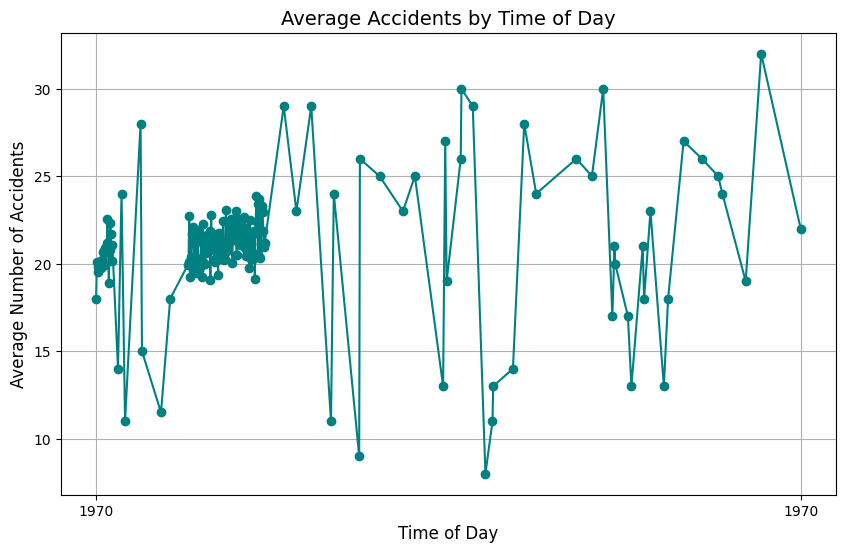

In [24]:
# Plot accident counts by time of the day of the day for dataset
# Grouping data by 'time_of_day' and calculating the mean of accidents
accidents_by_time_of_day = traffic_accidents_data.groupby('time_of_day')['accidents'].mean()

# Plotting the average accidents by time of day as a line plot
plt.figure(figsize=(10, 6))
plt.plot(accidents_by_time_of_day.index, accidents_by_time_of_day.values, marker='o', color='teal')

# Adding titles and labels
plt.title('Average Accidents by Time of Day', fontsize=14)
plt.xlabel('Time of Day', fontsize=12)
plt.ylabel('Average Number of Accidents', fontsize=12)

# Display the plot
plt.grid(True)
plt.show()


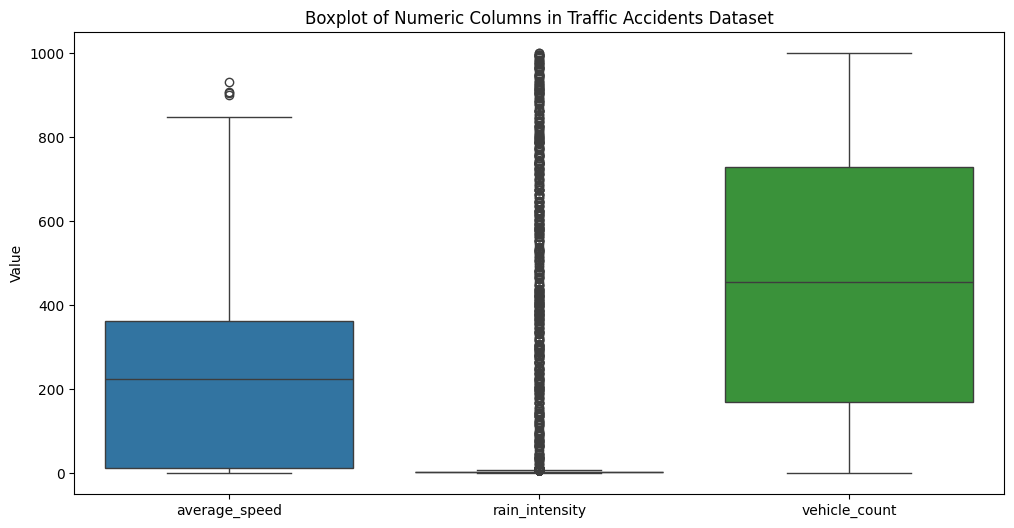

In [25]:
# descriptive statistics
# Numerical
# Descriptive statistics for numeric columns in Traffic Accidents
# Boxplot for visualizing the distribution of numeric columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=traffic_accidents_data[['average_speed', 'rain_intensity', 'vehicle_count']])
plt.title('Boxplot of Numeric Columns in Traffic Accidents Dataset')
plt.ylabel('Value')
plt.show()


<Figure size 1200x600 with 0 Axes>

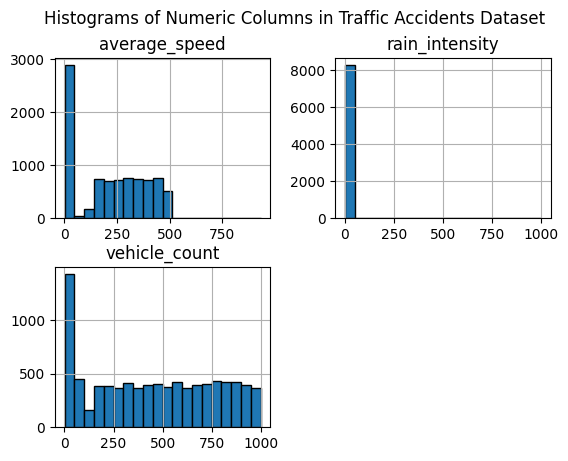

In [26]:
# Histogram for numeric columns to understand the distribution of data
plt.figure(figsize=(12, 6))
traffic_accidents_data[['average_speed', 'rain_intensity', 'vehicle_count']].hist(bins=20, edgecolor='black')
plt.suptitle('Histograms of Numeric Columns in Traffic Accidents Dataset')
plt.show()


In [27]:
# Counts of the Categorical(Text) Columns

# Categorical Data Analysis
traffic_accidents_data[['accidents', 'traffic_density']].corr()
traffic_accidents_data[['accidents', 'rain_intensity']].corr()
traffic_accidents_data[['accidents', 'pavement_quality']].corr()
traffic_accidents_data[['accidents', 'traffic_lights']].corr()
traffic_accidents_data.groupby('urban_area')['accidents'].mean()
traffic_accidents_data[['accidents', 'average_speed']].corr()
traffic_accidents_data.groupby('time_of_day')['accidents'].mean()
traffic_accidents_data[['accidents', 'vehicle_count']].corr()


,accidents,vehicle_count
accidents,1.000000,0.068399
vehicle_count,0.068399,1.000000


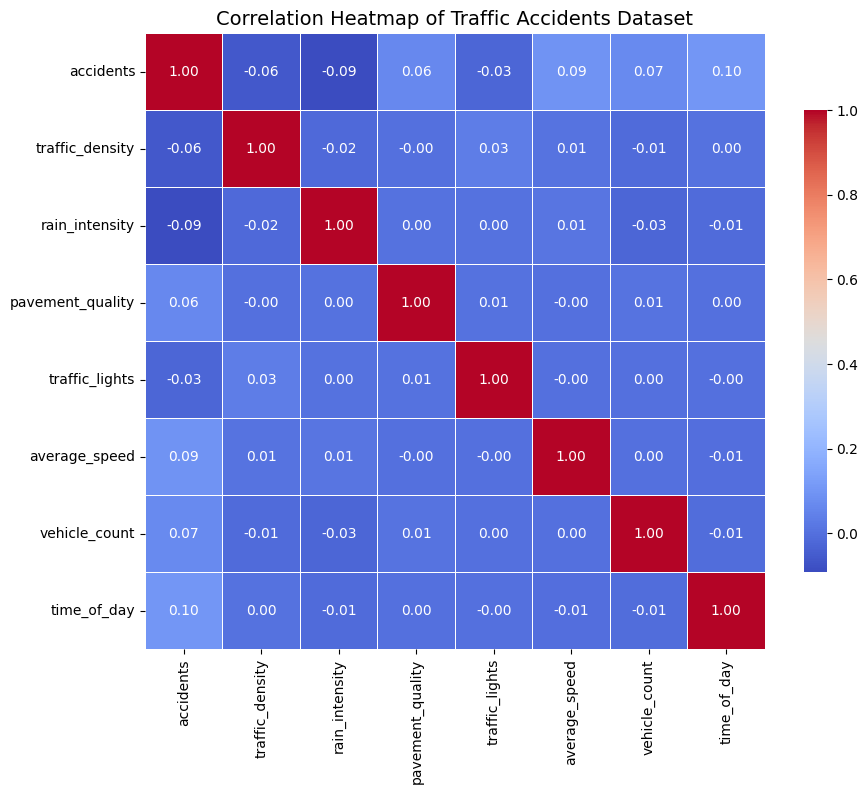

In [28]:
# Traffic Accidents - Correlation Matrix
corr_columns = ['accidents', 'traffic_density', 'rain_intensity', 'pavement_quality', 'traffic_lights',
                'average_speed', 'vehicle_count', 'time_of_day']

# Calculate the correlation matrix
corr_matrix = traffic_accidents_data[corr_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.75})

# Adding titles and labels
plt.title('Correlation Heatmap of Traffic Accidents Dataset', fontsize=14)
plt.show()


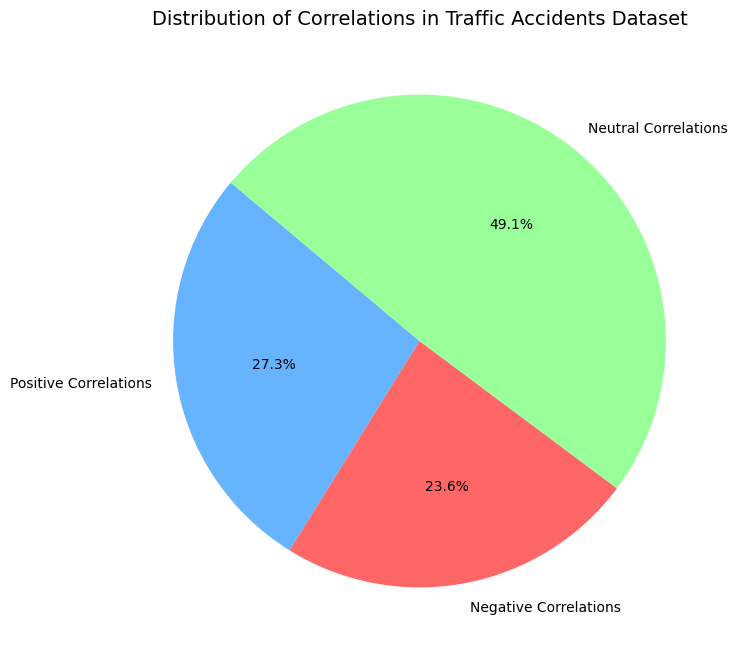

In [29]:
# using PIECHART TO analysis
# Calculate the correlation matrix
corr_matrix = traffic_accidents_data[corr_columns].corr()

# Flatten the correlation matrix and exclude the diagonal (self-correlation)
corr_values = corr_matrix.values[np.triu_indices_from(corr_matrix, k=1)]  # Upper triangle values (excluding diagonal)

# Classify the correlations into positive, negative, and neutral
positive_corr = np.sum(corr_values > 0)
negative_corr = np.sum(corr_values < 0)
neutral_corr = np.sum(np.abs(corr_values) < 0.1)  # Neutral correlations are those close to 0

# Prepare the data for the pie chart
correlation_categories = ['Positive Correlations', 'Negative Correlations', 'Neutral Correlations']
correlation_values = [positive_corr, negative_corr, neutral_corr]

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(correlation_values, labels=correlation_categories, autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#ff6666', '#99ff99'])
plt.title('Distribution of Correlations in Traffic Accidents Dataset', fontsize=14)
plt.show()


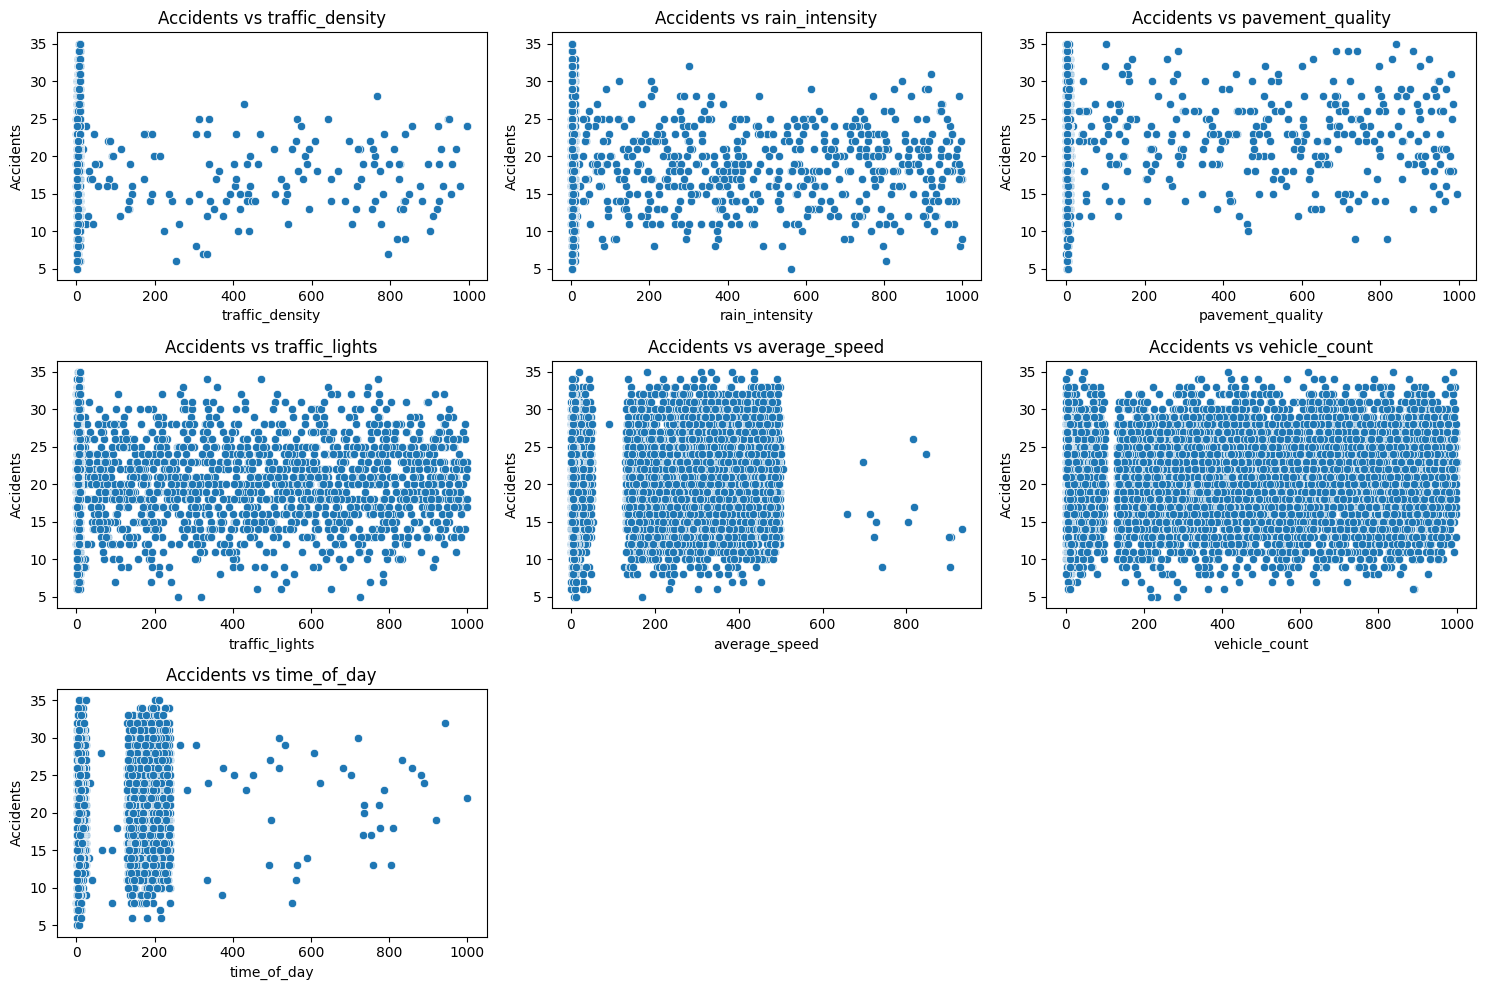

In [ ]:
# Scatter plots to visualizing relationships between two numerical variables
# List of columns to create scatter plots with 'accidents'
scatter_columns = ['traffic_density', 'rain_intensity', 'pavement_quality', 'traffic_lights',
                   'average_speed', 'vehicle_count', 'time_of_day']
plt.figure(figsize=(15, 10))

for i, col in enumerate(scatter_columns, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=traffic_accidents_data[col], y=traffic_accidents_data['accidents'])
    plt.title(f'Accidents vs {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Accidents', fontsize=10)

plt.tight_layout()  # For overlap
plt.show()
